<a href="https://colab.research.google.com/github/plancute/python/blob/master/deeplearning/code/14_2_%EB%B2%A0%EC%8A%A4%ED%8A%B8_%EB%AA%A8%EB%8D%B8_%EB%A7%8C%EB%93%A4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 학습한 code <br>
  deep_code/08_Wine.py <br>
  deep_code/09_Wine_Checkpoint.py <br>
  deep_code/10_Wine_Overfit_Graph.py <br>
  deep_code/11_Wine_Early_Stop.py <br>
  deep_code/12_Wine_Check_and_Stop.py <br>

3. 그래프로 확인하기 <br>
<< deep_code/10_Wine_Overfit_Graph.py >> 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
653/653 [==============================] - 0s 10us/sample - loss: 0.0266 - acc: 0.9908 - val_loss: 0.0543 - val_acc: 0.9845
Epoch 1002/3500
653/653 [==============================] - 0s 16us/sample - loss: 0.0256 - acc: 0.9908 - val_loss: 0.0635 - val_acc: 0.9845
Epoch 1003/3500
653/653 [==============================] - 0s 12us/sample - loss: 0.0242 - acc: 0.9893 - val_loss: 0.0702 - val_acc: 0.9845
Epoch 1004/3500
653/653 [==============================] - 0s 11us/sample - loss: 0.0265 - acc: 0.9923 - val_loss: 0.0600 - val_acc: 0.9876
Epoch 1005/3500
653/653 [==============================] - 0s 12us/sample - loss: 0.0210 - acc: 0.9923 - val_loss: 0.0567 - val_acc: 0.9814
Epoch 1006/3500
653/653 [==============================] - 0s 11us/sample - loss: 0.0319 - acc: 0.9877 - val_loss: 0.0563 - val_acc: 0.9845
Epoch 1007/3500
653/653 [==============================] - 0s 11us/sample - loss: 0.0253 - acc: 0.9939 - val_loss: 0.0641 - val_acc: 0.9845


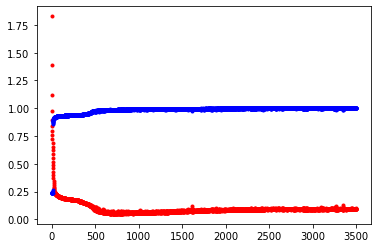

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

import pandas as pd
import numpy
import os
import matplotlib.pyplot as plt
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

df_pre = pd.read_csv('/content/drive/My Drive/data/wine.csv', header=None)
df = df_pre.sample(frac=0.15)

dataset = df.values
X = dataset[:,0:12]
Y = dataset[:,12]

# 모델의 설정
model = Sequential()
model.add(Dense(30,  input_dim=12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 모델 컴파일
model.compile(loss='binary_crossentropy',
          optimizer='adam',
          metrics=['accuracy'])

# 모델 저장 폴더 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
   os.mkdir(MODEL_DIR)

# 모델 저장 조건 설정
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# 모델 실행 및 저장
history = model.fit(X, Y, validation_split=0.33, epochs=3500, batch_size=500)

# y_vloss에 테스트셋으로 실험 결과의 오차 값을 저장
y_vloss=history.history['val_loss']

# y_acc 에 학습 셋으로 측정한 정확도의 값을 저장
y_acc=history.history['acc']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange(len(y_acc))
plt.plot(x_len, y_vloss, "o", c="red", markersize=3)
plt.plot(x_len, y_acc, "o", c="blue", markersize=3)

plt.show()
